# Pandas Exploratory Data Analysis Assignment

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the Titanic dataset using pandas and display the first few rows.

In [5]:
df=pd.read_csv(r'Desktop/data analyst techzone/python/Jupyter/titanic.csv')

In [7]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Q.Find out the total number of passengers in the dataset.

In [10]:
total_rows=df.shape[0]
print("The total number of passengers:",total_rows)

The total number of passengers: 891


# Display basic summary statistics (mean, median, min, max) of
passengers' ages.

In [13]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Q.Calculate the percentage of passengers who survived.

In [16]:
survival_rate=df['survived'].mean()*100
print("The percentage of passengers who survived is",survival_rate,'%')

The percentage of passengers who survived is 38.38383838383838 %


# Check for missing values in the dataset and handle them appropriately.

In [19]:
df.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
df['age'].fillna(df['age'].median(), inplace=True)

In [23]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# Replace missing 'Embarked' values with the most common port.
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
# Replace missing 'Embarked town' values with the most common port.

df['deck'].fillna('Unknown', inplace=True)

In [24]:
df.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# Create a new column 'AgeGroup' that categorises passengers as 'Child', 'Adult', or 'Elderly' based on their age

In [27]:
df['AgeGroup'] = pd.cut(df['age'], bins=[0, 12, 59, 100], labels=['Child', 'Adult', 'Elderly'], right=False)


In [29]:
df[['AgeGroup']].head()

,AgeGroup
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult


# Convert the 'Sex' column to numerical values
e.g., 0 for 'female', 1 
for 'male.

In [33]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [34]:
df[['sex']].head()

,sex
0,1
1,0
2,0
3,0
4,1


# Determine the average age of passengers
who survived and those 
who did not.

In [37]:
avg_age_survived = df[df['survived'] == 1]['age'].mean()
avg_age_not_survived = df[df['survived'] == 0]['age'].mean()
print("Average age of Survivors ",round(avg_age_survived))
print('\n')
print("Average age of non Survivors",round(avg_age_not_survived))

Average age of Survivors  28


Average age of non Survivors 30


# Find the percentage of passengers 
who survived based on their passenger class

In [41]:
survival_percent_byclass=df.groupby('pclass')['survived'].mean() * 100
for pclass, percentage in survival_percent_byclass.items():
    print(f"Passenger Class {pclass}: {round(percentage)}% survivors")

Passenger Class 1: 63% survivors
Passenger Class 2: 47% survivors
Passenger Class 3: 24% survivors


In [42]:
survival_by_gender=df.groupby('sex')['survived'].mean()*100

sex_map = {1: 'Male', 0: 'Female'}

for sex, percentage in survival_by_gender.items():
    print(f"{sex_map[sex]}: {round(percentage)}% survivors")

Female: 74% survivors
Male: 19% survivors


# Plot a histogram of passengers' ages.

In [45]:
import matplotlib.pyplot as plt

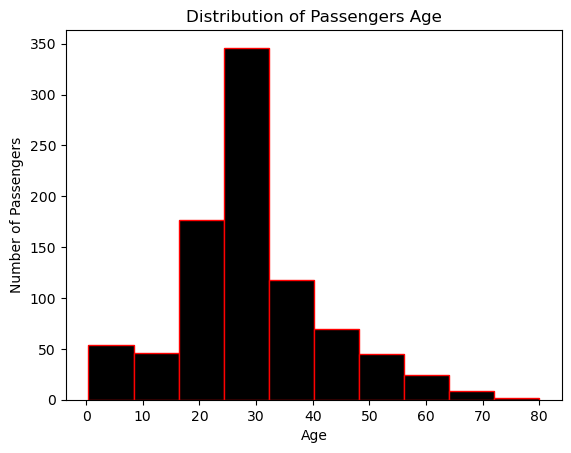

In [46]:
plt.hist(df['age'],bins=10,color='black', edgecolor='red')
plt.title('Distribution of Passengers Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Visualise the survival rate for different passenger classes using a stacked bar plot.

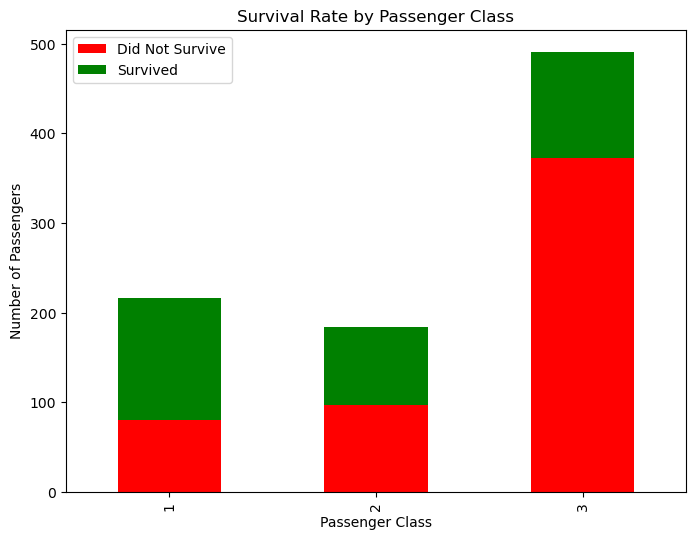

In [49]:
survival_counts = df.groupby(['pclass', 'survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))

plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'], loc='upper left')


# Determine the correlation between age, fare, and survival using a correlation matrix.

<function matplotlib.pyplot.show(close=None, block=None)>

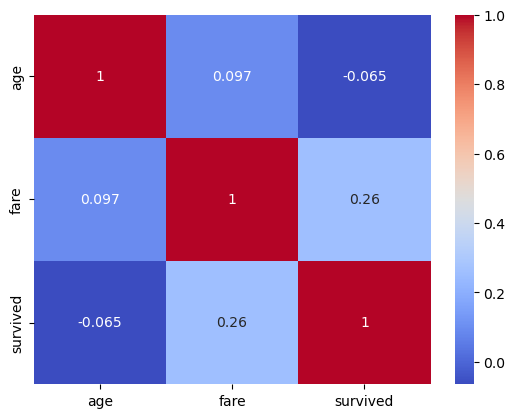

In [51]:
import seaborn as sns
sns.heatmap(df[['age','fare','survived']].corr(),annot=True,cmap='coolwarm')
plt.show

# Compare the survival rates of passengers with and without siblings or spouses aboard.

In [102]:
df['Has_Sibling_Spouse'] = (df['sibsp'] > 0).astype(int)
survival_rate_sibling_spouse = df.groupby('Has_Sibling_Spouse')['survived'].mean() * 100
survival_rate_sibling_spouse = survival_rate_sibling_spouse.round(2)
print(f"Survival rate for passengers with siblings or spouses aboard: {survival_rate_sibling_spouse[1]}%")
print(f"Survival rate for passengers without siblings or spouses aboard: {survival_rate_sibling_spouse[0]}%")

Survival rate for passengers with siblings or spouses aboard: 46.64%
Survival rate for passengers without siblings or spouses aboard: 34.54%


# Group passengers by their 'AgeGroup' 
and calculate theaverage fare for each group.

In [91]:
average_fare_agegroup = df.groupby('AgeGroup')['fare'].mean()
average_fare_agegroup = average_fare_agegroup.round(2)
print(average_fare_agegroup)

AgeGroup
Child      31.83
Adult      31.92
Elderly    41.10
Name: fare, dtype: float64


# Calculate the survival rate for passengers 
with different numbers of parents or children aboard

In [93]:
survival_rate_parch = df.groupby('parch')['survived'].mean() * 100
survival_rate_parch = survival_rate_parch.round(2)
print(survival_rate_parch)

parch
0    34.37
1    55.08
2    50.00
3    60.00
4     0.00
5    20.00
6     0.00
Name: survived, dtype: float64
